## Requirements

In [3]:
from datasets import load_dataset
import matplotlib.pyplot as plt

/home/gjb/mambaforge/envs/io_performance/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Reading data

Load the dataset, make sure to specify `'webdataset'` as the first argument to ensure the correct dataset builder is used.  The directory contains TAR files of images.

In [4]:
data = load_dataset('webdataset', data_dir='tmp_img_tars/')

The dataset gives access to individual images (and metadata) using its index.

In [5]:
data['train'][0]

{'__key__': 'img000001',
 '__url__': '/home/gjb/Projects/IO-performance/source-code/image-data/tmp_img_tars/negative.tar',
 'tiff': <PIL.Image.Image image mode=RGBA size=1152x648>}

The image itself is stored in the `tiff` column.

In [8]:
img = data['train'][0]['tiff']

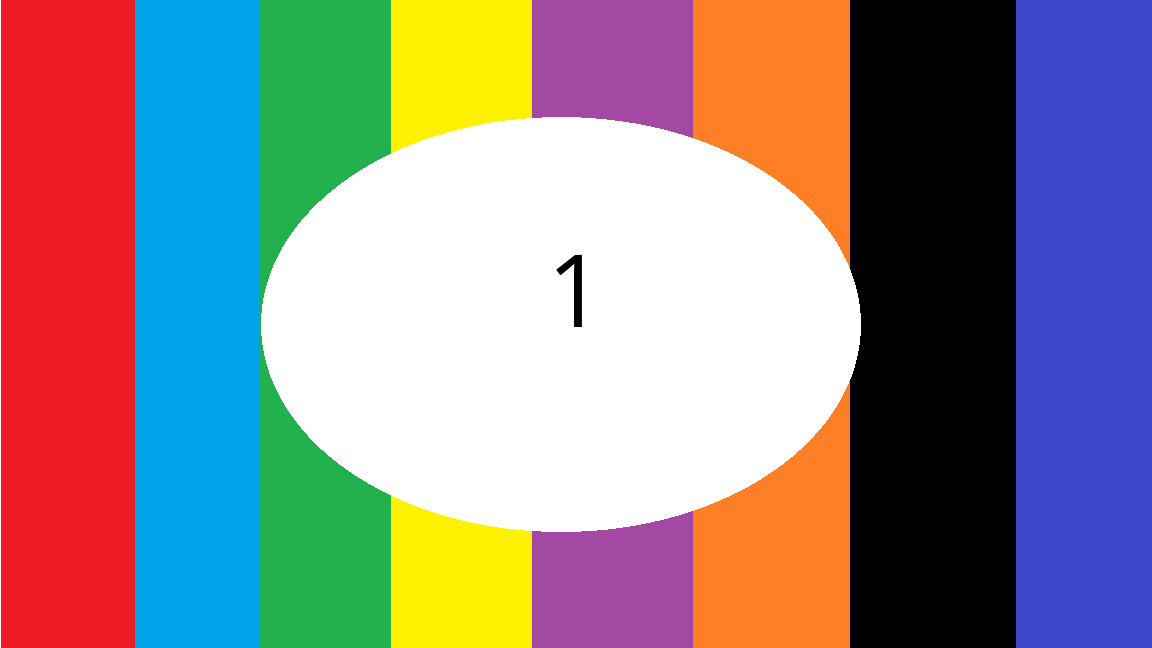

In [9]:
img

Note that the type of the image is a PIL `Image` object.

In [10]:
type(img)

PIL.Image.Image

There are indeed 250 images in the training set.

In [19]:
len(data['train'])

250